Twitter Sentiment Analysis - Beginners  Approach 

In [0]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string

from IPython.core.interactiveshell import InteractiveShell  ## getting
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import classification_report,confusion_matrix
import nltk
from nltk.stem.porter import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [0]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [49]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [50]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [0]:
combined_data = train.append(test,ignore_index=True)

In [0]:
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,"",input_txt)

  return input_txt

In [0]:
combined_data['tidy_tweet'] = np.vectorize(remove_pattern)(combined_data['tweet'], "@[\w]*")

In [54]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [0]:
combined_data['tidy_tweet']=combined_data['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [56]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [0]:
combined_data["tidy_tweet"] = combined_data['tidy_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [58]:
combined_data.head()   ## removed short words

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [59]:
tokenized_tweet = combined_data['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [60]:
stemmer = PorterStemmer()


tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [0]:
#Now let’s stitch these tokens back together.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined_data['tidy_tweet'] = tokenized_tweet

<Figure size 720x504 with 0 Axes>

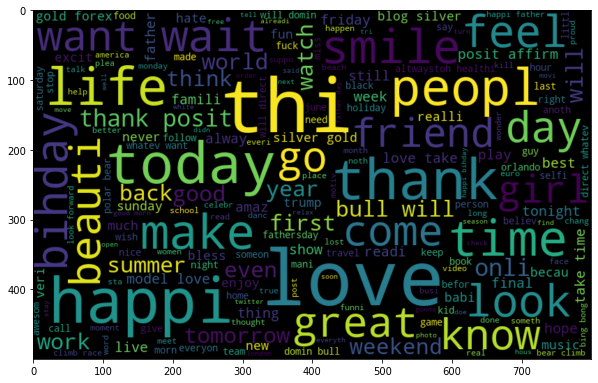

In [63]:
from wordcloud import WordCloud



all_words = ' '.join([text for text in combined_data['tidy_tweet']])



wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis('off')
plt.show()

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

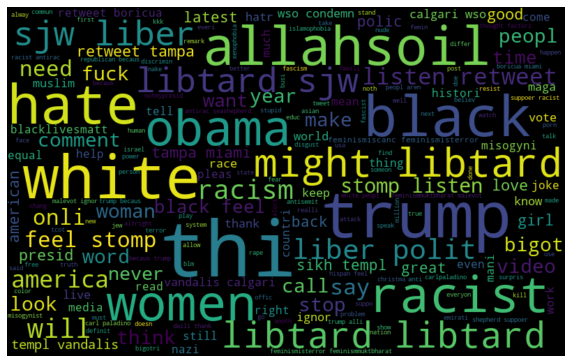

In [66]:
## now plotting negative and positive words

negative_words = " ".join([text for text in combined_data["tidy_tweet"][combined_data["label"]==1]])



wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

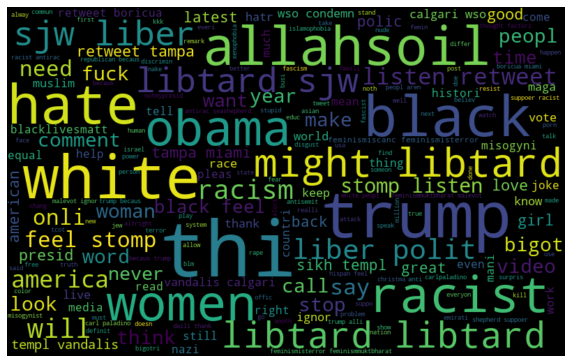

In [67]:

negative_words = " ".join([text for text in combined_data["tidy_tweet"][combined_data["label"]==1]])



wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

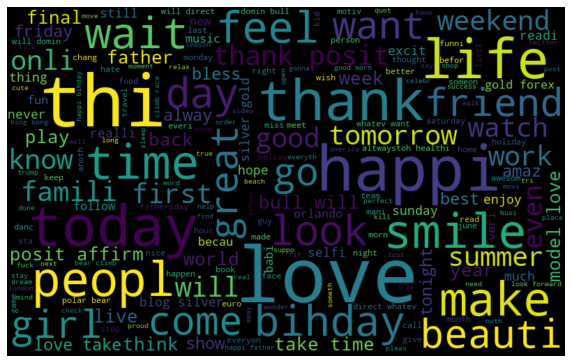

In [68]:

negative_words = " ".join([text for text in combined_data["tidy_tweet"][combined_data["label"]==0]])



wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [69]:
combined_data["label"].value_counts()


0.0    29720
1.0     2242
Name: label, dtype: int64

In [0]:

## what is the impact of hashtag 


def hashtag_extract(x):
  hashtags=[]
  for i in x:
    ht = re.findall(r"#(\w+)",i)
    hashtags.append(ht)
  return hashtags


In [72]:
combined_data["tidy_tweet"].head(10)

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
5    huge fare talk befor they leav chao disput whe...
6                                  camp tomorrow danni
7    next school year year exam think about that #s...
8    love land #allin #cav #champion #cleveland #cl...
9                                          welcom here
Name: tidy_tweet, dtype: object

In [77]:

HT_regular = hashtag_extract(combined_data['tidy_tweet'][combined_data['label'] == 0])
print(HT_regular)
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combined_data['tidy_tweet'][combined_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
print(HT_regular)
HT_negative = sum(HT_negative,[])

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv'], ['allshowandnogo'], [], ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'], ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'], [], ['ireland', 'blog', 'silver', 'gold', 'forex'], ['orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love'], ['gettingf'], ['got', 'junior', 'yugyoem', 'omg'], ['thank', 'posit'], ['friday', 'cooki'], [], ['euro'], ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'], ['wine', 'weekend'], ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'], ['upsideofflorida', 'shopalyssa', 'love'], ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'], ['ica'], [], ['rip', 'orlando'], [], ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'], [], ['goodnight', 'badmonday'], ['taylorswift'], ['travelingram', 'dalat', 'ripinkylif'], ['photoshop', 'enoughisenough', 'dontphoto

<Figure size 1152x360 with 0 Axes>

[Text(0, 0.5, 'Count')]

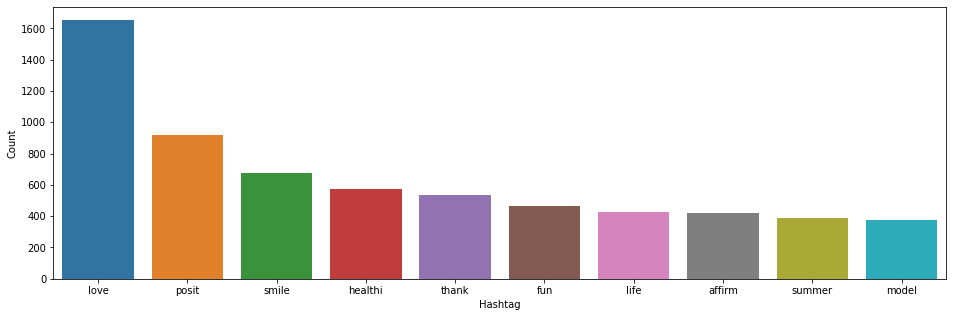

In [80]:
a= nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [81]:
a

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

In [82]:
d

,Hashtag,Count
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


<Figure size 1152x360 with 0 Axes>

[Text(0, 0.5, 'Count')]

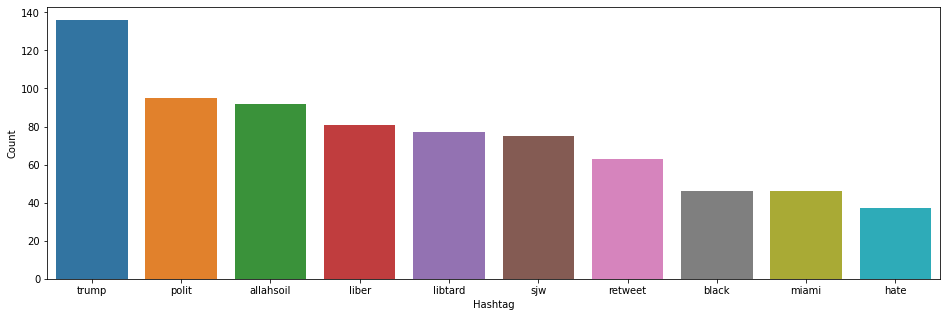

In [83]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix

bow = bow_vectorizer.fit_transform(combined_data['tidy_tweet'])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combined_data['tidy_tweet'])


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set

prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.5303408146300915

In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV fil

In [98]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.5451327433628319

In [136]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


X_train,X_valid,y_train,y_valid = train_test_split(train_tfidf,train["label"],random_state=42,test_size=0.3)
xgb = XGBClassifier(n_estimators=1000,objective="binary:logistic",max_depth=40,n_jobs=4)



xgb.fit(X_train,y_train)

predict_xgb = xgb.predict_proba(X_valid)

prediction_int = predict_xgb[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
print()
print(f1_score(y_valid, prediction_int)) # calculating f1 score
print(confusion_matrix(y_valid,prediction_int))
print(classification_report(y_valid,prediction_int))




test_pred_xgb = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred_xgb[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('xgb_sub_lreg_bow.csv', index=False) # writing data to a CSV fil


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


0.5528846153846155
[[8686  219]
 [ 339  345]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.61      0.50      0.55       684

    accuracy                           0.94      9589
   macro avg       0.79      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [134]:

X_train,X_valid,y_train,y_valid = train_test_split(train_tfidf,train["label"],random_state=42,test_size=0.3)

rf =RandomForestClassifier(n_estimators=1000,criterion="entropy",n_jobs=-1)


rf.fit(X_train,y_train)

preds_rf = rf.predict_proba(X_valid)


prediction_int = preds_rf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
print()



# print()
# print(f1_score(y_valid, preds)) # calculating f1 score
# print(confusion_matrix(y_valid,preds))
# print(classification_report(y_valid,preds))


# predict_xgb = xgb.predict_proba(X_valid)

# prediction_int = prediction_xgb[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(np.int)
print()
print(f1_score(y_valid, prediction_int)) # calculating f1 score
print(confusion_matrix(y_valid,prediction_int))
print(classification_report(y_valid,prediction_int))




test_pred_rf = rf.predict_proba(test_tfidf)
test_pred_int = test_pred_rf[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('rf_sub_lreg_bow.csv', index=False) # writing data to a CSV fil

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)



0.5773501110288675
[[8628  277]
 [ 294  390]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8905
           1       0.58      0.57      0.58       684

    accuracy                           0.94      9589
   macro avg       0.78      0.77      0.77      9589
weighted avg       0.94      0.94      0.94      9589



In [131]:

X_train,X_valid,y_train,y_valid = train_test_split(train_tfidf,train["label"],random_state=42,test_size=0.3)

dt =DecisionTreeClassifier(criterion="entropy",)

dt.fit(X_train,y_train)


preds_dt = dt.predict_proba(X_valid)

prediction_int = preds_dt[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
print()


print()
print(f1_score(y_valid, prediction_int)) # calculating f1 score
print(confusion_matrix(y_valid,prediction_int))
print(classification_report(y_valid,prediction_int))


test_pred_dt = dt.predict_proba(test_tfidf)
test_pred_int = test_pred_dt[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('dt_sub_lreg_bow.csv', index=False) # writing data to a CSV fil

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')



0.5238480194017784
[[8676  229]
 [ 360  324]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8905
           1       0.59      0.47      0.52       684

    accuracy                           0.94      9589
   macro avg       0.77      0.72      0.75      9589
weighted avg       0.93      0.94      0.94      9589



In [128]:
# preds_rf = rf.predict_proba(X_valid)


# prediction_int = preds_rf[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
# prediction_int = prediction_int.astype(np.int)
# print()
# print(f1_score(y_valid, prediction_int)) # calculating f1 score
# print(confusion_matrix(y_valid,prediction_int))
# print(classification_report(y_valid,prediction_int))



test_pred = lreg.predict_proba(test_)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('rf_sub_lreg_bow.csv', index=False) # writing data to a CSV fil


0.53551912568306
[[8383  522]
 [ 243  441]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      8905
           1       0.46      0.64      0.54       684

    accuracy                           0.92      9589
   macro avg       0.71      0.79      0.75      9589
weighted avg       0.94      0.92      0.93      9589



In [0]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV fil